# Problem Statement 5

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
# Load the census data into a pandas DataFrame
census_data = pd.read_csv('census_2011.csv')

In [68]:
# Define the columns to keep
columns_to_keep = [
    "State name",
    "District name",
    "Population",
    "Male",
    "Female",
    "Literate",
    "Male_Literate",
    "Female_Literate",
    "Rural_Households",
    "Urban_Households",
    "Households",
    "Age_Group_0_29",
    "Age_Group_30_49",
    "Age_Group_50",
    "Age not stated"
]


C:\Users\vivek\AppData\Local\Temp\ipykernel_10068\1432680181.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  census_data['Population'].fillna(census_data['Male'] + census_data['Female'], inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_10068\1432680181.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

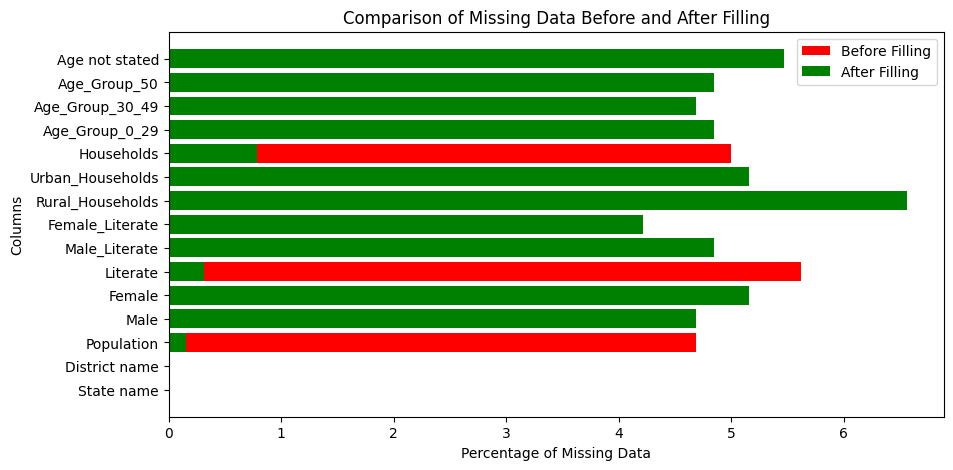

              Column  Missing Percentage
0         State name             0.00000
1      District name             0.00000
2         Population             0.15625
3               Male             4.68750
4             Female             5.15625
5           Literate             0.31250
6      Male_Literate             4.84375
7    Female_Literate             4.21875
8   Rural_Households             6.56250
9   Urban_Households             5.15625
10        Households             0.78125
11    Age_Group_0_29             4.84375
12   Age_Group_30_49             4.68750
13      Age_Group_50             4.84375
14    Age not stated             5.46875


In [69]:
# Keep only the required columns
census_data = census_data[columns_to_keep]

# Step 1: Calculate the percentage of missing data before filling
missing_before = (census_data.isnull().sum() / len(census_data)) * 100

# Step 2: Fill missing data using provided hints
census_data['Population'].fillna(census_data['Male'] + census_data['Female'], inplace=True)
census_data['Literate'].fillna(census_data['Male_Literate'] + census_data['Female_Literate'], inplace=True)
census_data['Households'].fillna(census_data['Rural_Households'] + census_data['Urban_Households'], inplace=True)
census_data['Population'].fillna(census_data['Age_Group_0_29'] + census_data['Age_Group_30_49'] + census_data['Age_Group_50'] + census_data['Age not stated'], inplace=True)

# Step 3: Recalculate the percentage of missing data after filling
missing_after = (census_data.isnull().sum() / len(census_data)) * 100

# Step 4: Create a visualization to compare the amount of missing data before and after filling
plt.figure(figsize=(10, 5))
plt.barh(missing_before.index, missing_before, color='red', label='Before Filling')
plt.barh(missing_after.index, missing_after, color='green', label='After Filling')
plt.xlabel('Percentage of Missing Data')
plt.ylabel('Columns')
plt.title('Comparison of Missing Data Before and After Filling')
plt.legend()
plt.show()

# Step 5: Store the percentage of missing data for each column
missing_percentage = pd.DataFrame({'Column': missing_after.index, 'Missing Percentage': missing_after.values})
print(missing_percentage)

# Problem Statement 6

In [26]:
import pandas as pd

In [27]:
# Load the housing data
housing_data = pd.read_csv('housing.csv')

# Load the census data
census_data = pd.read_csv('census.csv')

In [30]:
# Assuming 'District' column exists in housing_data and census_data, merge both datasets on 'District'
combined_data = pd.merge(census_data, housing_data, on='District code', how='inner')

# Save the processed data to a CSV file named “census.csv” in the “Clean_Data” folder
combined_data.to_csv('Clean_Data_census.csv', index=False)

In [31]:
print(combined_data.head())

   District code           State/UT District  Population      Male    Female  \
0              1  Jammu and Kashmir  Kupwara    870354.0  474190.0  396164.0   
1              1  Jammu and Kashmir  Kupwara    870354.0  474190.0  396164.0   
2              1  Jammu and Kashmir  Kupwara    870354.0  474190.0  396164.0   
3              2  Jammu and Kashmir   Badgam    753745.0       NaN  355704.0   
4              2  Jammu and Kashmir   Badgam    753745.0       NaN  355704.0   

   Literate  Literate_Male  Literate_Female      SC  ...  Contition_T_Total  \
0  439654.0       282823.0         156831.0  1048.0  ...                100   
1  439654.0       282823.0         156831.0  1048.0  ...                100   
2  439654.0       282823.0         156831.0  1048.0  ...                100   
3  335649.0       207741.0         127908.0     NaN  ...                100   
4  335649.0       207741.0         127908.0     NaN  ...                100   

   Contition_T_Good  Contition_T_Livable  Co

In [32]:
# Summary statistics
summary_stats = combined_data.describe()
print(summary_stats)

       District code    Population          Male        Female      Literate  \
count    1908.000000  1.819000e+03  1.818000e+03  1.810000e+03  1.802000e+03   
mean      320.066038  1.854397e+06  9.672964e+05  9.126122e+05  1.187483e+06   
std       184.280200  1.431178e+06  7.852125e+05  7.421393e+05  1.037234e+06   
min         1.000000  8.004000e+03  4.414000e+03  3.590000e+03  4.436000e+03   
25%       161.000000  8.177140e+05  4.205220e+05  4.012582e+05  4.832630e+05   
50%       320.000000  1.563715e+06  7.977120e+05  7.556020e+05  9.797690e+05   
75%       479.000000  2.564169e+06  1.318408e+06  1.248698e+06  1.599151e+06   
max       640.000000  1.000978e+07  5.865078e+06  5.195070e+06  8.227161e+06   

       Literate_Male  Literate_Female            SC       Male_SC  \
count   1.816000e+03     1.828000e+03  1.803000e+03  1.839000e+03   
mean    6.739952e+05     5.108085e+05  3.186388e+05  1.628814e+05   
std     5.662359e+05     4.736222e+05  3.172888e+05  1.626138e+05   
min

In [43]:
# Calculating the correlation matrix
correlation_matrix = summary_stats.corr()
print(correlation_matrix)

                       District code  Population      Male    Female  \
District code               1.000000   -0.002090  0.008539  0.002230   
Population                 -0.002090    1.000000  0.999370  0.999819   
Male                        0.008539    0.999370  1.000000  0.999843   
Female                      0.002230    0.999819  0.999843  1.000000   
Literate                    0.018881    0.997638  0.999441  0.998721   
...                              ...         ...       ...       ...   
Residence_Good              0.956273   -0.253409 -0.238049 -0.246596   
Residence_Livable           0.954508   -0.257844 -0.242367 -0.250952   
Residence_Dilapidated       0.947550   -0.275356 -0.259520 -0.268235   
Residence_cum_other         0.951763   -0.256069 -0.239981 -0.248820   
Residence_cum_Good          0.947175   -0.275658 -0.259770 -0.268509   

                       Literate  Literate_Male  Literate_Female        SC  \
District code          0.018881       0.018807         0.0

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

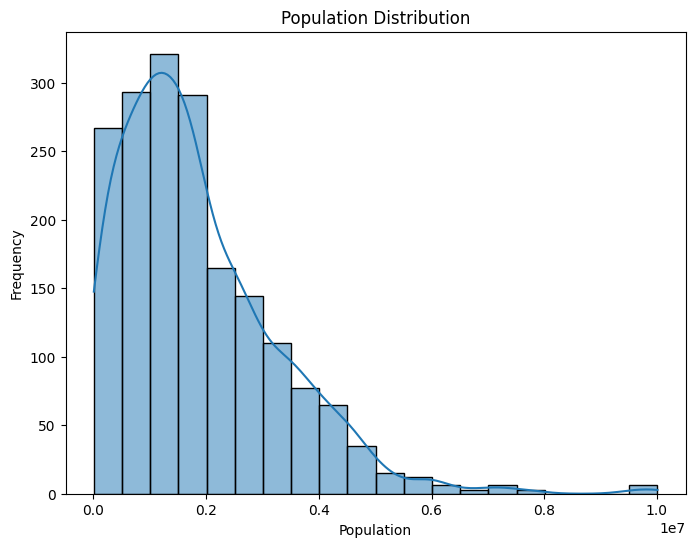

In [36]:
# Example: Histogram of population
plt.figure(figsize=(8, 6))
sns.histplot(combined_data['Population'], bins=20, kde=True)
plt.title('Population Distribution')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

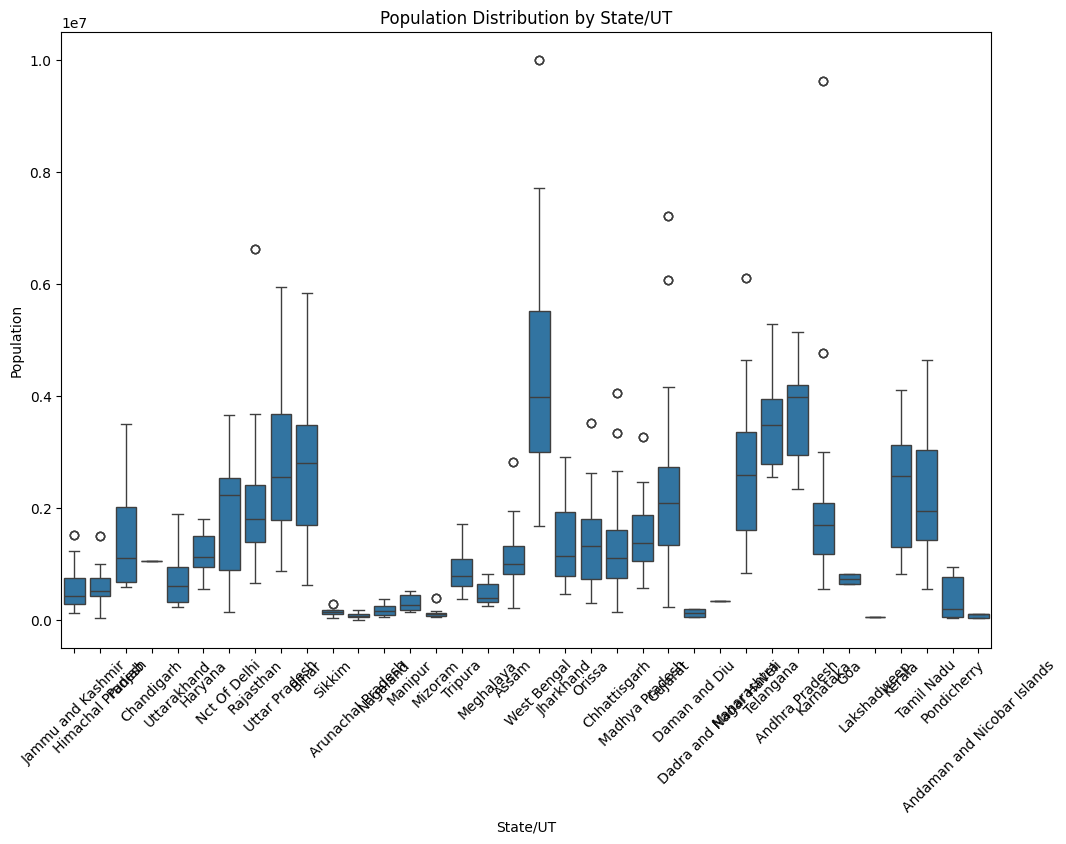

In [37]:
# Example: Box plot of population by State/UT
plt.figure(figsize=(12, 8))
sns.boxplot(x='State/UT', y='Population', data=combined_data)
plt.title('Population Distribution by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()

# Problem Statement 7

In [80]:
import pandas as pd

In [81]:
# Read relevant columns from housing data
housing_data = pd.read_csv('housing.csv', usecols=['District Name', 'Rural/Urban', 
                                                         'Total Number of households', 
                                                         'Total Number of Livable', 
                                                         'Total Number of Dilapidated', 
                                                         'Latrine_premise'])

# Read relevant columns from census data
census_data = pd.read_csv('census_2011.csv', usecols=['District name', 'Households', 
                                                      'Rural_Households', 'Urban_Households','Population'])


In [82]:
# Merge housing and census data on District Name
merged_data = pd.merge(housing_data, census_data,left_on='District Name', right_on='District name', how='left')


In [83]:
# Calculate absolute values for Total Number of Dilapidated and Latrine_premise
merged_data['Households_Rural_Dilapidated'] = merged_data['Total Number of Dilapidated'] * merged_data['Rural_Households'] / 100
merged_data['Households_Urban_Dilapidated'] = merged_data['Total Number of Dilapidated'] * merged_data['Urban_Households'] / 100
merged_data['Households_Rural_Toilet_Premise'] = merged_data['Latrine_premise'] * merged_data['Rural_Households'] / 100
merged_data['Households_Urban_Toilet_Premise'] = merged_data['Latrine_premise'] * merged_data['Urban_Households'] / 100


In [84]:
# Rename columns
merged_data.rename(columns={'District Name': 'District',
                            'Total Number of households': 'Households',
                            'Total Number of Livable': 'Households_Rural_Livable',
                            'Households': 'Households_Urban','Population':'Population'
                           ,'Households_Rural_Toilet_Premise':'Households_Rural_Toilet_Premise',
                           'Households_Urban_Toilet_Premise':'Households_Urban_Toilet_Premise',
                           'Urban_Households':'Urban_Households','Rural_Households':'Rural_Households'}, inplace=True)

In [85]:
# Save the processed data to a CSV file
merged_data.to_csv('Clean_Data_housing.csv', index=False)

In [86]:
# Report if any district data is in one file but not the other
missing_districts_housing = merged_data[merged_data['District name'].isnull()]['District'].unique()
missing_districts_census = merged_data[merged_data['District name'].isnull()]['District name'].unique()
print("District data missing in housing data:", missing_districts_housing)
print("District data missing in census data:", missing_districts_census)

District data missing in housing data: ['Lahul & Spiti' 'Dadra & Nagar Haveli' 'LAKSHADWEEP' 'Puducherry'
 'North  & Middle Andaman']
District data missing in census data: [nan]


# Problem Statement 8

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# Load the processed housing data
housing_data = pd.read_csv('Clean_Data_housing.csv')

In [90]:
# Calculate number of households per 100 people
housing_data['Households_per_100_people'] = (housing_data['Households'] / housing_data['Population']) * 100

# Calculate percentage of households with toilets in premise
housing_data['Percentage_with_toilets'] = (housing_data['Households_Urban_Toilet_Premise'] + housing_data['Households_Rural_Toilet_Premise']) / housing_data['Households'] * 100

# Calculate urban to rural population ratio
housing_data['Urban_to_Rural_Population_Ratio'] = housing_data['Urban_Households'] / housing_data['Rural_Households']


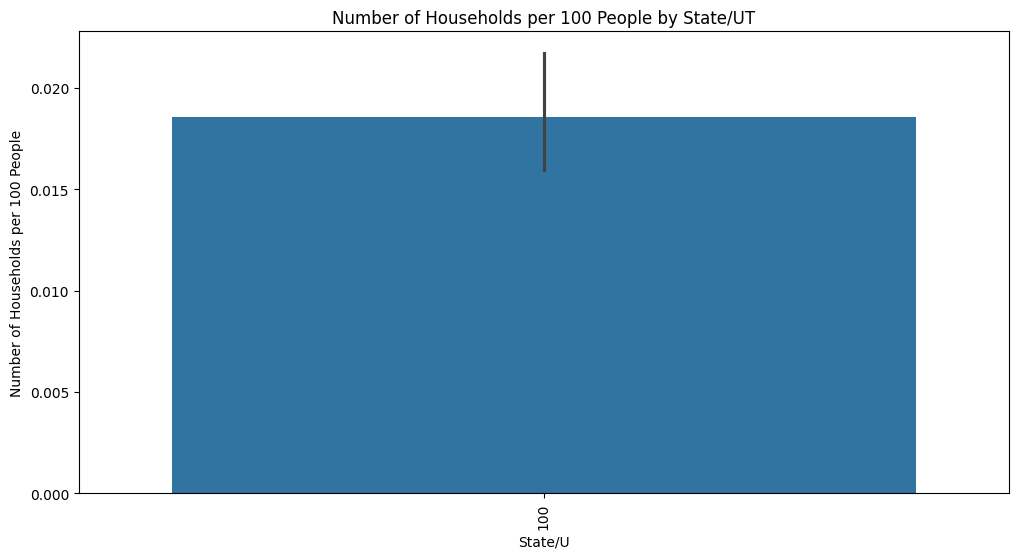

In [92]:
# Plotting number of households per 100 people for each state
plt.figure(figsize=(12, 6))
sns.barplot(x='Households', y='Households_per_100_people', data=housing_data)
plt.title('Number of Households per 100 People by State/UT')
plt.xticks(rotation=90)
plt.ylabel('Number of Households per 100 People')
plt.xlabel('State/U')
plt.show()

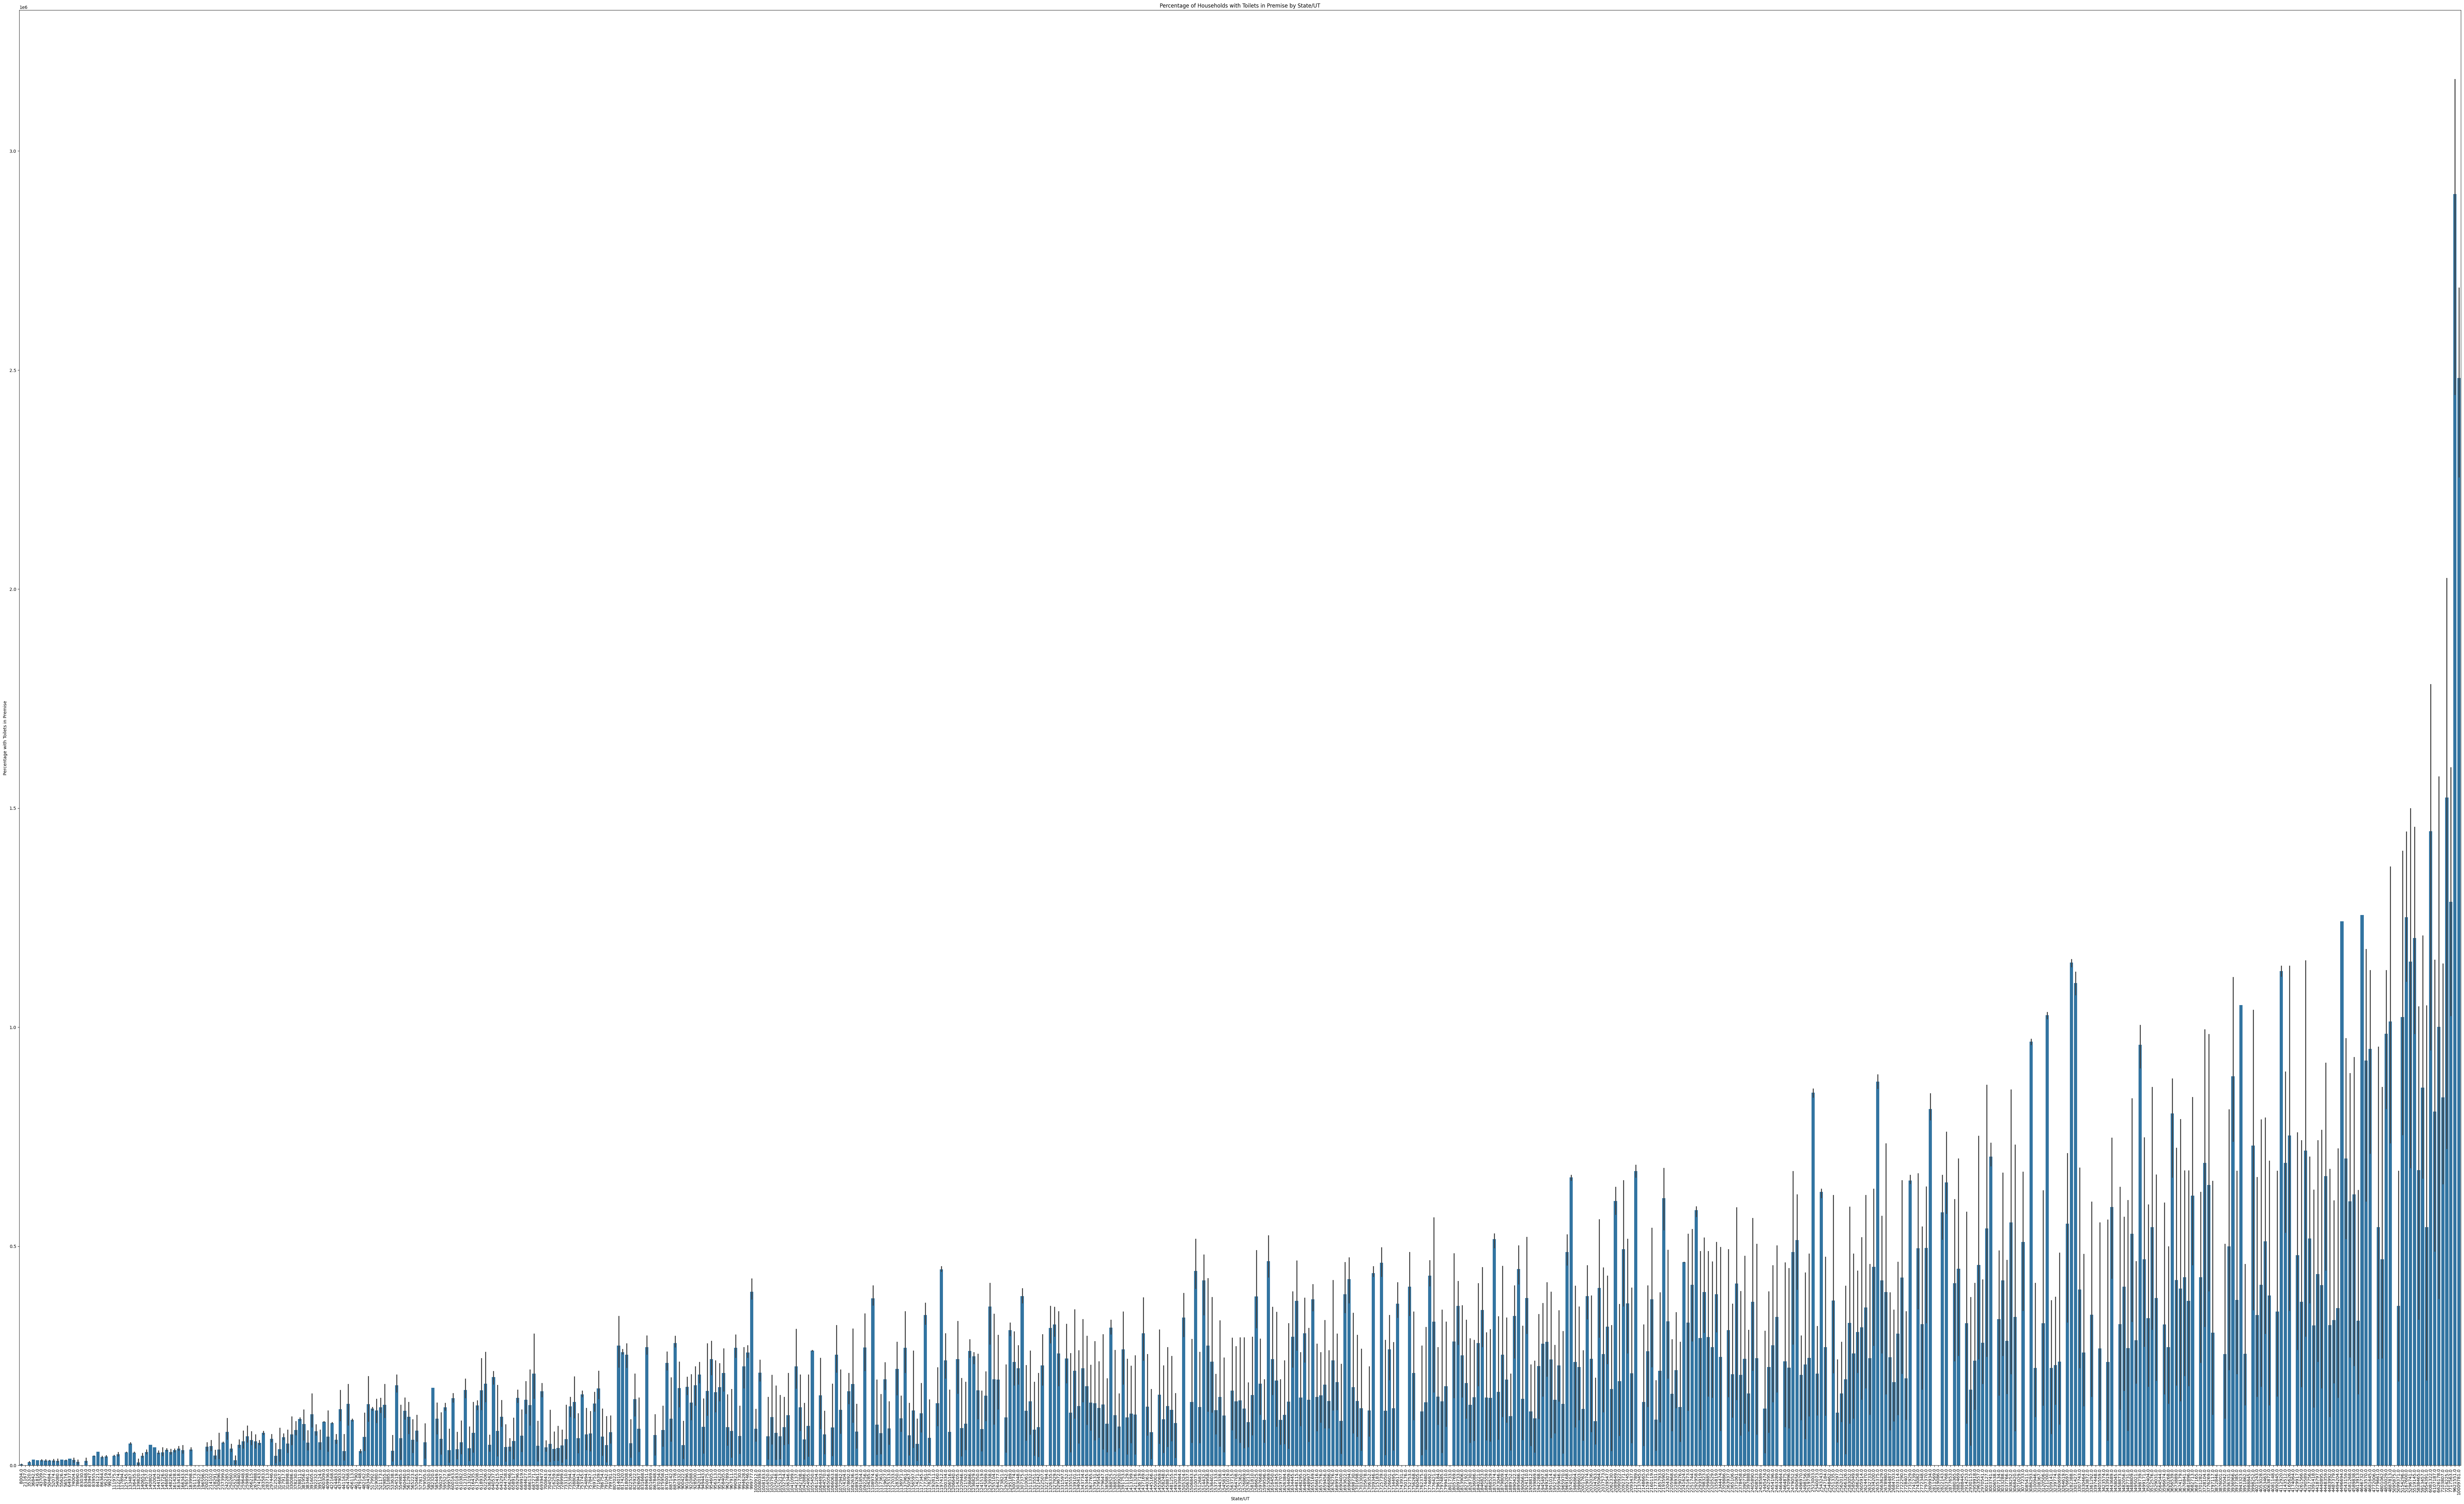

In [97]:
#Plotting percentage of households with toilets in premise for each state
plt.figure(figsize=(100, 60))
sns.barplot(x='Population', y='Percentage_with_toilets', data=housing_data)
plt.title('Percentage of Households with Toilets in Premise by State/UT')
plt.xticks(rotation=90)
plt.ylabel('Percentage with Toilets in Premise')
plt.xlabel('State/UT')
plt.show()

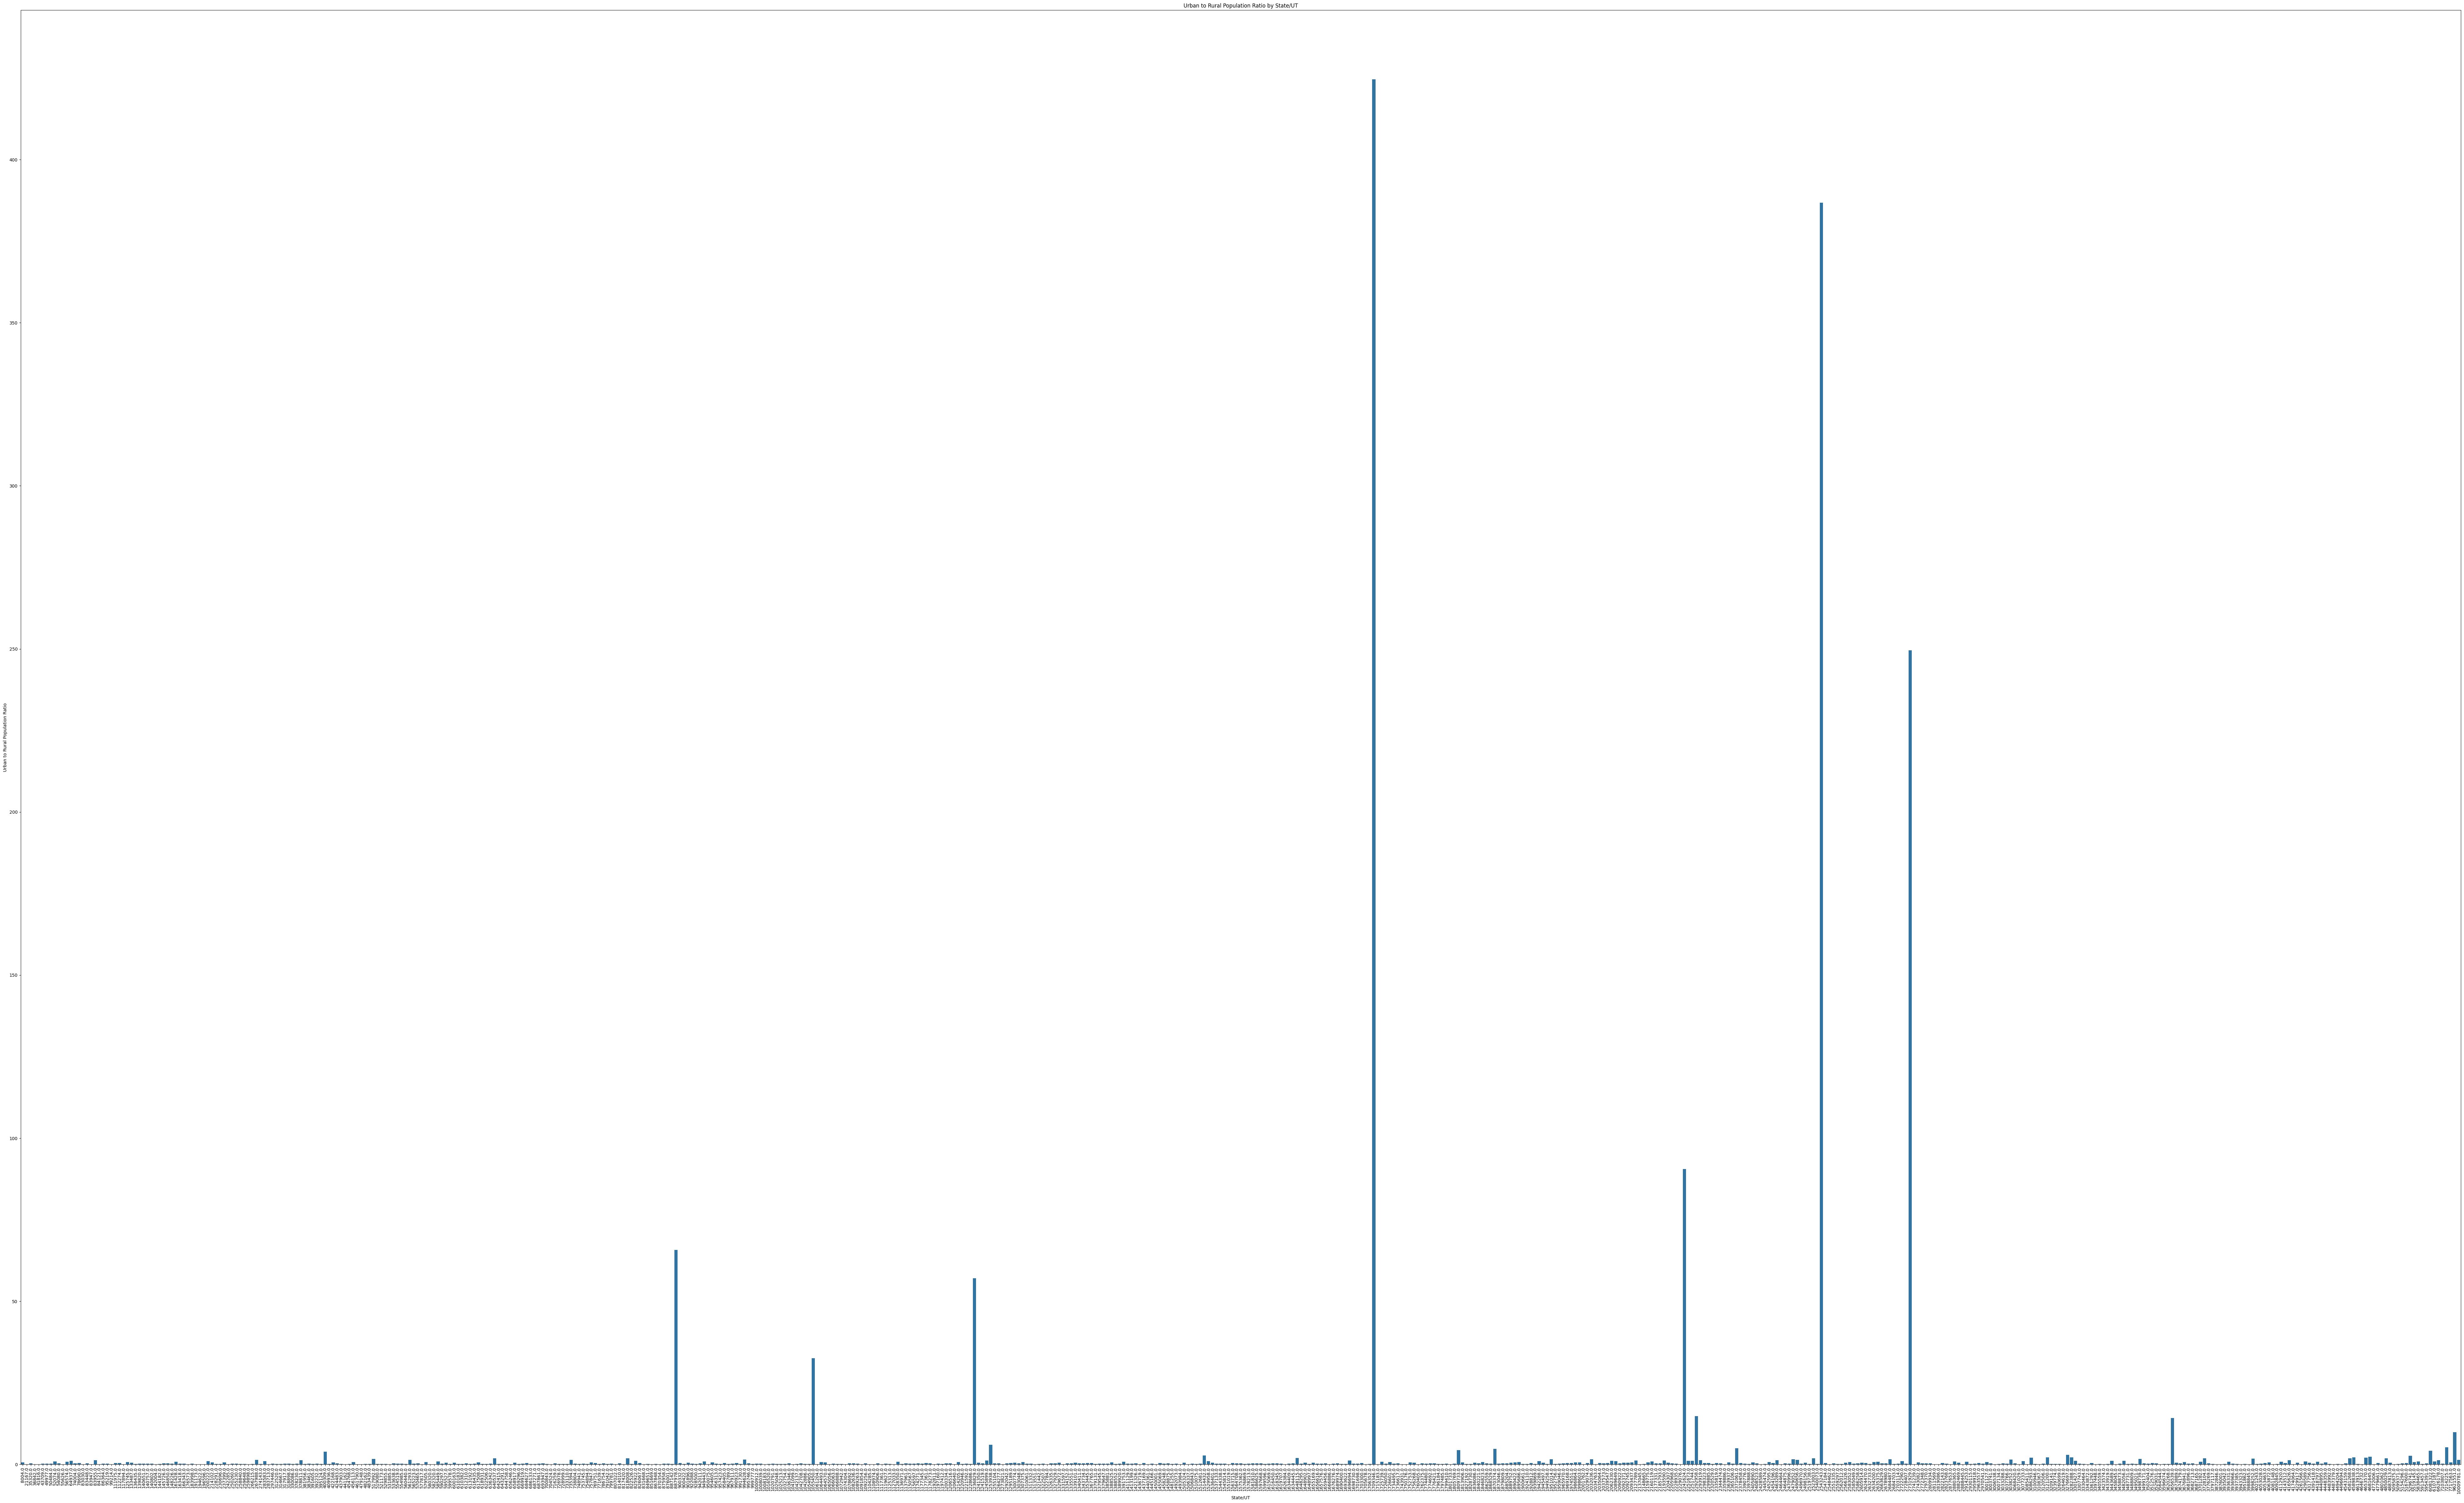

In [98]:
# Plotting urban to rural population ratio for each state
plt.figure(figsize=(100, 60))
sns.barplot(x='Population', y='Urban_to_Rural_Population_Ratio', data=housing_data)
plt.title('Urban to Rural Population Ratio by State/UT')
plt.xticks(rotation=90)
plt.ylabel('Urban to Rural Population Ratio')
plt.xlabel('State/UT')
plt.show()

# Problem Statement 9

In [99]:
import pandas as pd

In [101]:
 #Load relevant columns from housing data
housing_data = pd.read_csv('Clean_Data_housing.csv', usecols=['District', 'Households_Rural_Livable', 'Households_Urban'])

# Load relevant columns from census data
census_data = pd.read_csv('census_2011.csv', usecols=['District name', 'Rural_Households', 'Urban_Households'])


In [102]:
# Merge the datasets on district names
merged_data = pd.merge(housing_data, census_data, left_on='District', right_on='District name', how='inner')

In [104]:
# Calculate the percentage difference between Rural_Households and Urban_Households from both datasets
merged_data['Rural_Households_Difference'] = ((merged_data['Households_Rural_Livable'] - merged_data['Rural_Households']) / merged_data['Rural_Households']) * 100
merged_data['Urban_Households_Difference'] = ((merged_data['Households_Urban'] - merged_data['Urban_Households']) / merged_data['Urban_Households']) * 100

In [105]:
# Identify districts with major differences (>10% difference) between datasets
major_differences = merged_data[(abs(merged_data['Rural_Households_Difference']) > 10) | 
                                (abs(merged_data['Urban_Households_Difference']) > 10)]


In [106]:
# Report the names of districts with major differences
print("Districts with major differences in Rural_Households or Urban_Households:")
print(major_differences[['District', 'Rural_Households_Difference', 'Urban_Households_Difference']])

Districts with major differences in Rural_Households or Urban_Households:
           District  Rural_Households_Difference  Urban_Households_Difference
0           Kupwara                   -99.963330                          NaN
1           Kupwara                   -99.963834                          NaN
2           Kupwara                   -99.968757                          NaN
3            Badgam                   -99.971179                   590.838544
4            Badgam                   -99.972175                   590.838544
...             ...                          ...                          ...
1997       Nicobars                   -99.850859                          inf
1998       Nicobars                   -99.850859                          inf
1999  South Andaman                   -99.904014                    68.932077
2000  South Andaman                   -99.924357                    68.932077
2001  South Andaman                   -99.938684                    